Part 1 for "Segmenting and Clustering Neighborhoods in Toronto" Peer Graded Assignment

First we import pandas:

In [1]:
import pandas as pd

Then we take the first table from the provided link with the code below:

In [2]:
data = pd.read_html('http://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

Next 2 steps involve removing 'Borough' columns with 'Not assigned' values, resetting the index and removing the unnecessary 'index' column:

In [3]:
data = data[data['Borough'] != 'Not assigned'].reset_index()

In [4]:
data.drop('index', axis = 'columns', inplace = True)

In [5]:
data

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


This last row below gives the shape of our dataframe:

In [6]:
data.shape

(103, 3)

Coordinate Values for the 103 Postal Codes are extracted with the code below:

In [7]:
gc = pd.read_csv('Geospatial_Coordinates.csv')


The new dataframe 'gc' is inner joined by the initial dataframe 'data' on key 'Postal Code'

In [8]:
datanew = pd.merge(data, gc, on = 'Postal Code', how = 'inner')

In [9]:
datanew

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


# PART 3

To cluster the data, first I have imported library 'matplotlib.pyplot' to see as if points show similarity about their locations in the 2D space, as the assignment suggested I have only used the coordinate values of Boroughs, whose name contains the word 'Toronto':

In [27]:
import matplotlib.pyplot as plt

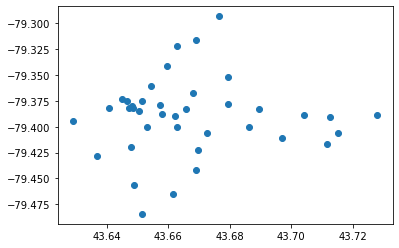

In [28]:
plt.scatter(datanew[datanew['Borough'].str.contains(r'Toronto')]['Latitude'], datanew[datanew['Borough'].str.contains(r'Toronto')]['Longitude'])

Looking at the scatterplot, there seems to be 4 clusters :

1) Points on the north
2) Points on the left mid
3) Points on the south
4) Points on the east

So I will perform k-means clustering with k = 4, and for simplicity I will define a new dataframe from the original 'datanew' dataframe to work with data in which 'Borough' column includes the word 'Toronto':

In [253]:
dn = datanew[datanew['Borough'].str.contains(r'Toronto')].reset_index()

In [254]:
dn.drop('index', axis = 'columns', inplace = True)

In [323]:
import numpy as np
from sklearn.cluster import KMeans

In [324]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [325]:
A = dn[['Latitude', 'Longitude']].values

In [355]:
k_means.fit(A)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.66943648, -79.32465436],
       [ 43.65506566, -79.44547176],
       [ 43.6547639 , -79.38308287],
       [ 43.70563855, -79.39811351]])

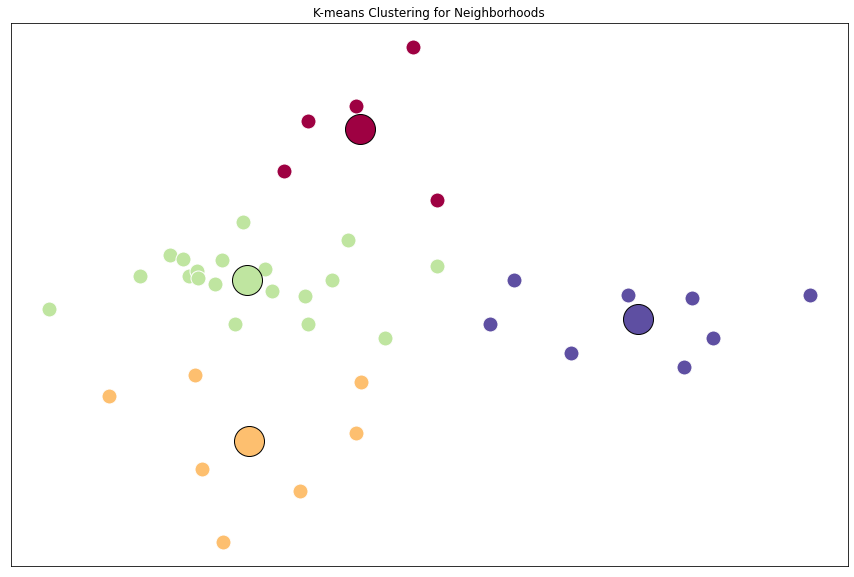

In [356]:
fig = plt.figure(figsize=(15, 10))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))


ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[43.66943648, -79.32465436], [43.65506566, -79.44547176], [43.6547639 , -79.38308287], [43.70563855, -79.39811351]])), colors):

    my_members = (k_means_labels == k)
    
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(A[my_members, 0], A[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=30)
    
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=30)

ax.set_title('K-means Clustering for Neighborhoods')

ax.set_xticks(())

ax.set_yticks(())

plt.show()

The figure above suggests that with simple use of lat and lon values, we can see the four clusters. In order to verify our findings, we try to plot the neighborhoods on folium map, using geo specifics for Toronto:

In [335]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 
import folium


Solving environment: ...working... done

# All requested packages already installed.



In [334]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


The map below confirms our findings, actually it shows the 90 degrees counterclockwise rotated view of what has been found in the K-means algorithm above.

In [342]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(dn['Latitude'], dn['Longitude'], dn['Borough'], dn['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto